C:\Users\sh\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


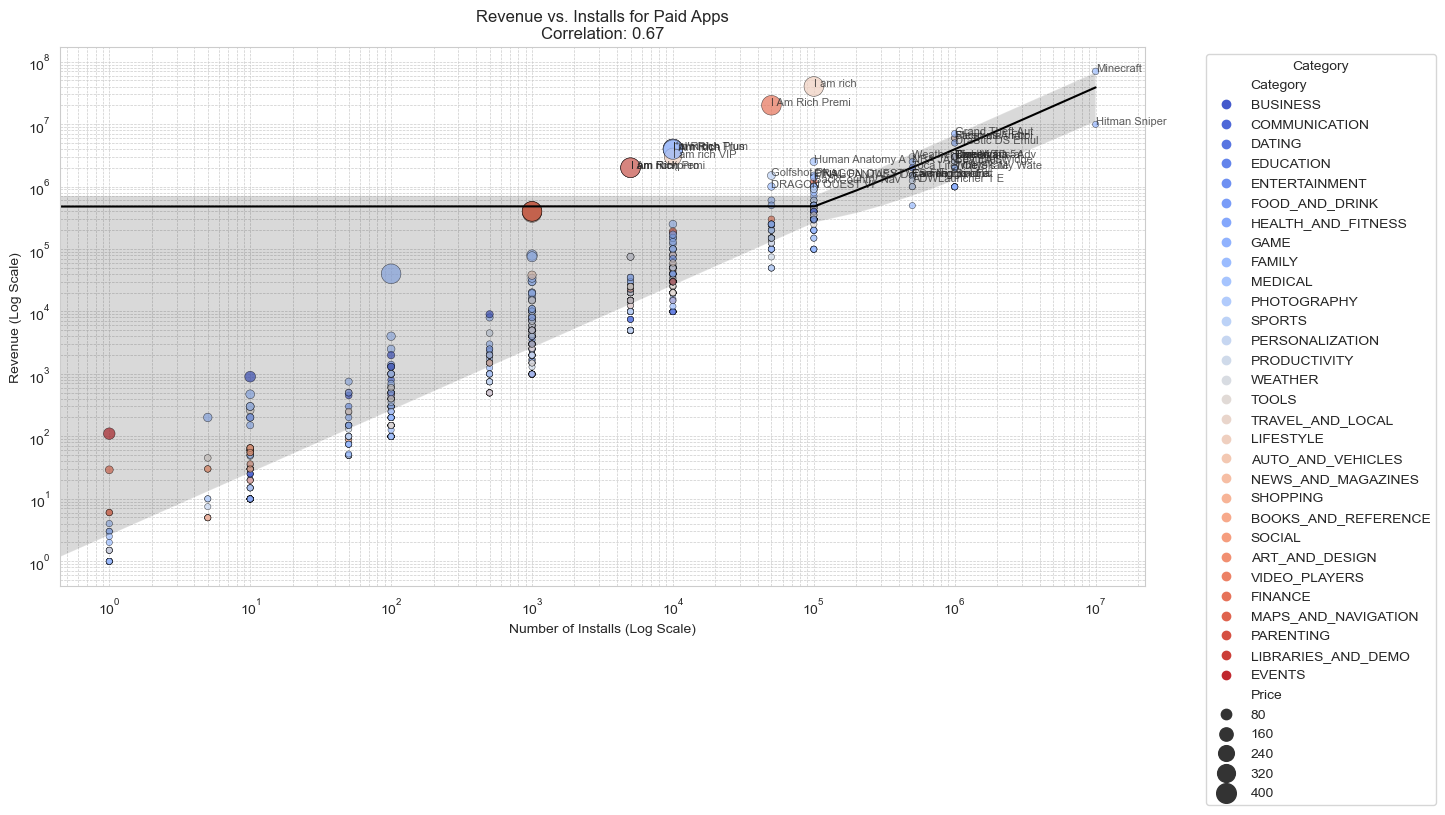

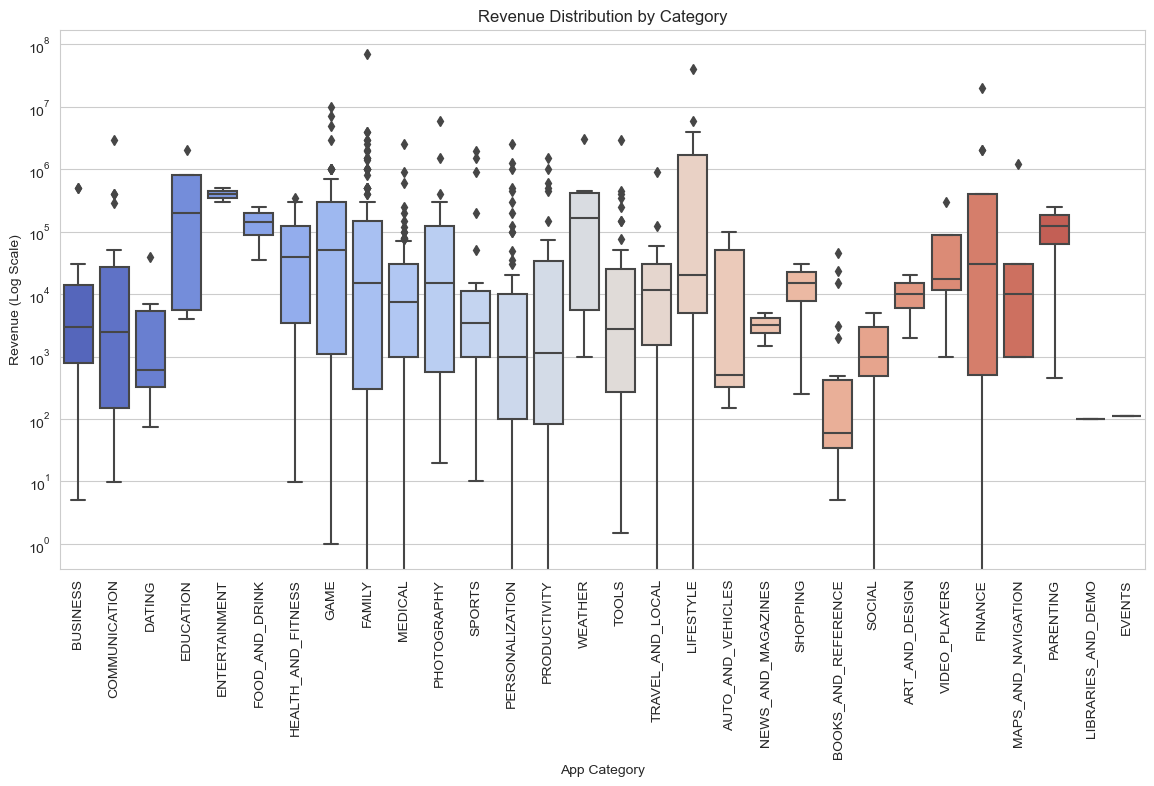

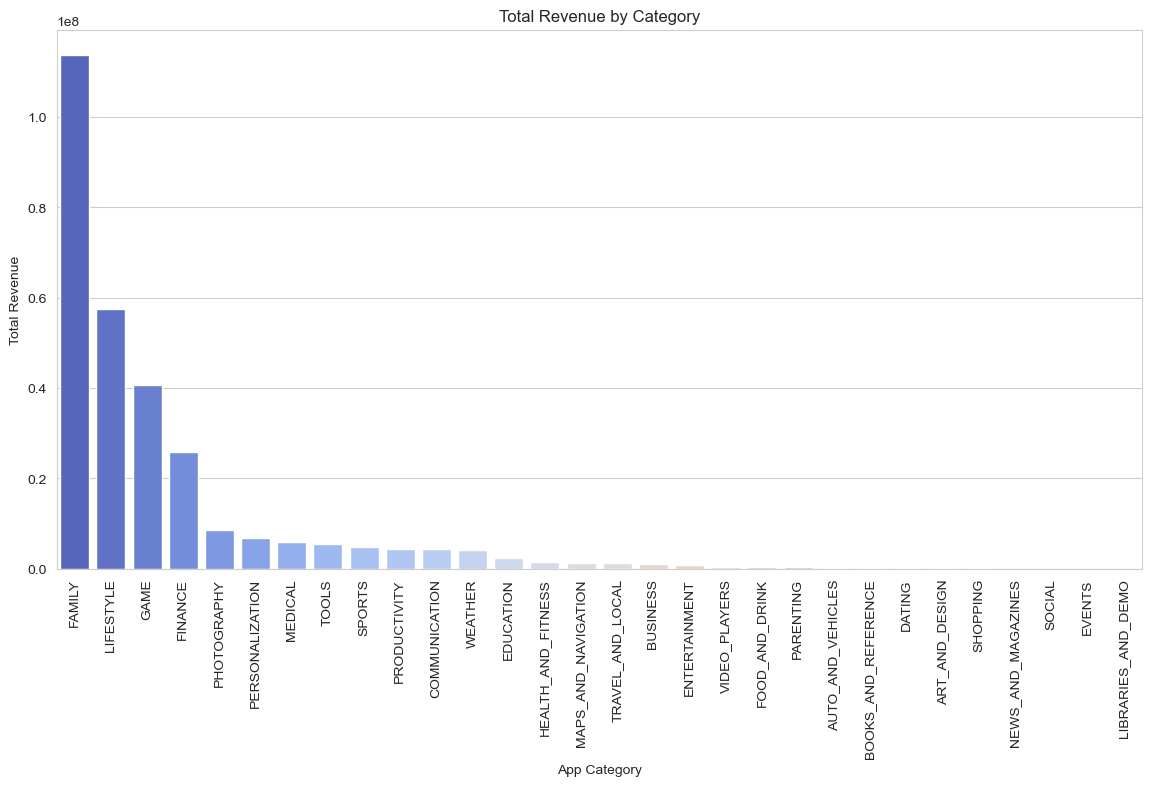

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("GooglePlayStore.zip")

df = df[df['Type'] == 'Paid'].copy()

df = df.dropna(subset=['Installs', 'Price', 'Category', 'App'])

df['Installs'] = df['Installs'].astype(str).str.replace(r'[^0-9]', '', regex=True).astype(float)

df['Price'] = df['Price'].astype(str).str.replace(r'[^0-9.]', '', regex=True).astype(float)

df['Revenue'] = df['Installs'] * df['Price']

correlation = df[['Installs', 'Revenue']].corr().iloc[0, 1]

plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")

scatter = sns.scatterplot(data=df, x='Installs', y='Revenue', hue='Category', palette='coolwarm', alpha=0.7, edgecolor='k', size='Price', sizes=(20, 200))

sns.regplot(data=df, x='Installs', y='Revenue', scatter=False, color='black', line_kws={"linewidth": 1.5})

plt.xscale('log')
plt.yscale('log')
plt.xlabel("Number of Installs (Log Scale)")
plt.ylabel("Revenue (Log Scale)")
plt.title(f"Revenue vs. Installs for Paid Apps\nCorrelation: {correlation:.2f}")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

for i, row in df.iterrows():
    if row['Revenue'] > df['Revenue'].quantile(0.95):
        plt.text(row['Installs'], row['Revenue'], row['App'][:15], fontsize=8, alpha=0.75)

plt.show()

plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='Category', y='Revenue', palette='coolwarm')
plt.xticks(rotation=90)
plt.yscale('log')
plt.xlabel("App Category")
plt.ylabel("Revenue (Log Scale)")
plt.title("Revenue Distribution by Category")
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(data=df.groupby('Category', as_index=False).agg({'Revenue': 'sum'}).sort_values(by='Revenue', ascending=False), x='Category', y='Revenue', palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel("App Category")
plt.ylabel("Total Revenue")
plt.title("Total Revenue by Category")
plt.show()
